In [1]:
%cd ..

/workspaces/cnn_exercise


In [2]:
%load_ext autoreload
%autoreload 2
%cd src
import matplotlib.pyplot as plt

from backstage.dataset import DogDataset
import backstage.utils as utils
import torchvision.transforms as TVF
%cd ..


/workspaces/cnn_exercise/src
/workspaces/cnn_exercise


In [35]:
inputTransform = TVF.Compose(
    [
        TVF.Resize(size=(224, 224)),
        TVF.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

In [55]:
test = DogDataset(
    "/data",
    "dataset_test.h5",
    as_tensor=True,
    localization=False,
    apply_random_sized_bbox_safe_crop=False,
    detectionGridSize=[7, 7],
    imageSize=[224, 224],
)

In [56]:
x,y = test[55]
detection_results = utils.extract_bounding_boxes(y)
detection_results

[(tensor(1., dtype=torch.float64),
  tensor(0.6208, dtype=torch.float64),
  tensor(0.5110, dtype=torch.float64),
  tensor(0.7180, dtype=torch.float64),
  tensor(0.5952, dtype=torch.float64))]

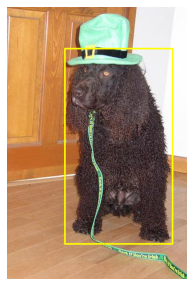

In [57]:
utils.showImage(utils.draw_detection_result(x, detection_results))

In [58]:
import os
import yaml
import torch
from src.backstage.models import Classifier

file = "params.yaml"
with open(file, mode="r") as f:
    config = yaml.safe_load(f)

param_cfg = config['train']

model = Classifier(args=param_cfg['models'], nCategories=120)


fn = "data/checkpoints/epoch-13.pt"
if (os.path.isfile(fn)):
    checkpoint = torch.load(fn, map_location=torch.device("cpu"))
    model.load_state_dict(checkpoint["model"])
model.eval()


Classifier(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): ConvNormActivation(
   

torch.Size([5, 7, 7])
tensor(0.6312, grad_fn=<MaxBackward1>)


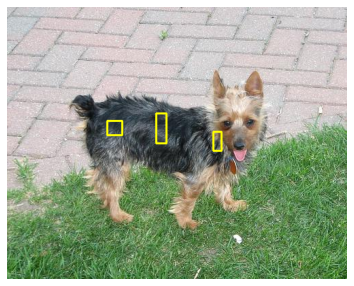

In [60]:
x,y = test[25]
yhat = model(inputTransform(x.unsqueeze(0)))[0]
print(yhat.shape)
yhat[0] = torch.sigmoid(yhat[0])
# print(yhat)
print(torch.max(yhat[0]))
detection_results = utils.extract_bounding_boxes(yhat, threshold=0.6)
utils.showImage(utils.draw_detection_result(x, detection_results))


In [46]:
localization_dataset = DogDataset(
    "/data",
    "dataset_test.h5",
    as_tensor=True,
    localization=True,
    apply_random_sized_bbox_safe_crop=True,
    detectionGridSize=[3, 3],
    imageSize=[224, 224],
)

tensor([0.4679, 0.8028, 0.3945, 0.7798], dtype=torch.float64)
torch.Size([3, 218, 218])


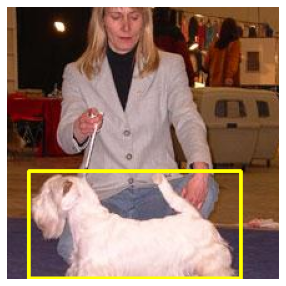

In [54]:
image, label = localization_dataset[190]
bbox = label[1:5]
print(label[1:5])
print(image.shape)
utils.showImage(utils.draw_bbox_from_tensor(image, bbox))

In [42]:
localization_dataset_safe_bbox_off = DogDataset(
    "/data",
    "dataset_test.h5",
    as_tensor=True,
    localization=True,
    apply_random_sized_bbox_safe_crop=False,
    detectionGridSize=[3, 3],
    imageSize=[224, 224],
)

torch.Size([3, 344, 227])


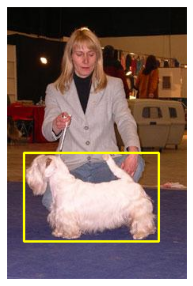

In [45]:
image, label = localization_dataset_safe_bbox_off[190]
print(image.shape)
utils.showImage(utils.draw_bbox_from_tensor(image,label[1:5]))